Funnel and Cohort Analysis

In [ ]:
# Meng-install library Python yang akan digunakan
!pip install chart-studio

# Mengimport library Python yang akan digunakan
import numpy as np
import pandas as pd
import os
from chart_studio import plotly
from chart_studio import plotly as py
from plotly import graph_objs as go
from __future__ import division
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Funnel Analysis

### Data Inspection

In [ ]:
# Mengimport data
df_funnel = pd.read_csv('events.csv')

In [ ]:
# Mengetahui jenis dan jumlah data menggunakan metode info() dan describe()
df_funnel.info()
df_funnel.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


,product_id,category_id,price,user_id
count,8.851290e+05,8.851290e+05,885129.000000,8.851290e+05
mean,1.906621e+06,2.144423e+18,146.328713,1.515916e+18
std,1.458708e+06,6.165105e+14,296.807683,3.554165e+07
min,1.020000e+02,2.144416e+18,0.220000,1.515916e+18
25%,6.988030e+05,2.144416e+18,26.460000,1.515916e+18
50%,1.452883e+06,2.144416e+18,65.710000,1.515916e+18
75%,3.721194e+06,2.144416e+18,190.490000,1.515916e+18
max,4.183880e+06,2.227847e+18,64771.060000,1.515916e+18


In [ ]:
# Melihat contoh sampel data secara acak
df_funnel.sample(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
324883,2020-11-20 20:28:31 UTC,view,137302,2144415924491387038,computers.components.motherboard,asus,55.16,1515915625541828038,ct2KkGN1Jz
742089,2021-02-04 16:28:12 UTC,view,949004,2144415921169498184,NaN,samsung,15.08,1515915625600644941,he6EwZRnzY
342243,2020-11-23 20:51:52 UTC,view,655728,2144415923384090754,NaN,interpower,33.25,1515915625542967299,tLqKU6eiN1
263801,2020-11-12 07:22:05 UTC,view,1785245,2144415925011480748,stationery.cartrige,canon,43.11,1515915625529471316,9TC3A2bzIH
125249,2020-10-21 05:08:13 UTC,view,4102097,2144415948256314150,computers.peripherals.keyboard,defender,12.60,1515915625528592593,BkRNSxdy3G
592908,2021-01-12 09:16:17 UTC,view,4155383,2144415922427789416,computers.components.videocards,powercolor,251.40,1515915625573734319,knqWZb2Tjr
643384,2021-01-19 23:07:46 UTC,view,949002,2144415921169498184,NaN,lg,13.16,1515915625595043728,jEeQVrMmnp
627720,2021-01-17 17:06:53 UTC,cart,1821557,2144415922528452715,electronics.telephone,sirius,16.19,1515915625594221497,nvYmx2LqSq
245639,2020-11-09 16:50:09 UTC,cart,495121,2144415933794353554,NaN,pioneer,103.83,1515915625535803339,yPezInjiyl
879076,2021-02-27 19:13:08 UTC,view,340992,2144415943516750494,NaN,NaN,1.57,1515915625610531139,OKMQViW0of


Dari data df_marketing yang ditampilkan diketahui:

1. Data terdiri atas 9 kolom dan 885129 baris
2. Data numerical:

 - product_id
 - category_id
 - price
 - user_id

3. Data categorical

 - event_time
 - event_type
 - category_code
 - brand
 - user_session

4. Data kolom category_code, brand, dan user_session memiliki missing value

5. Data kolom conversion memiliki nilai maksimal 1 dan nilai minimal 0, maka data kolom conversion kemungkinan bermakna apakah conversion terjadi atau tidak (1 = Ya, 0 = Tidak)

6. Data kolom price memiliki nilai minimal dan maksimal positif

### Data Preparation

Setelah melakukan Data Inspection, maka dilakukan data preparation berupa:

1. Karena terdapat data missing values, yaitu data kolom category_code, brand, dan user_session, maka perlu dilaporkan kepada user / pihak ketiga yang bertanggungjawab terhadap data tsb. sehingga hal tsb dapat diperbaiki dan kedepannya dapat dihindari. Jika kemudian mendapatkan instruksi penanganan terhadap data ybh, maka baru dilakukan tindak lebih lanjut. **Dalam kasus ini, baris yang mengandung missing values akan dihapus**.

2. Mengubah data menjadi yang memiliki format yang dapat digunakan dalam visualisasi funnel

In [ ]:
# Meng-copy data untuk menghindari edit pada data primer langsung
df_funnel = df_funnel.copy()

In [ ]:
# Menghitung jumlah baris yang mengandung missing values
df_funnel_copy.isnull().sum()

event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64

Dari hasil perhitungan diatas, dapat diketahui:
1. Data kolom category_code memiliki missing values sebanyak 236219 baris
2. Data kolom brand memiliki missing values sebanyak 212364 baris
3. Data kolom user_session memiliki missing values sebanyak 165 baris

In [ ]:
# Men-drop baris yang memiliki missing value pada data kolom category_code
df_funnel_copy = df_funnel_copy.dropna(subset=['category_code'])

# Men-drop baris yang memiliki missing value pada data kolom brand
df_funnel_copy = df_funnel_copy.dropna(subset=['brand'])

# Men-drop baris yang memiliki missing value pada data kolom user_session
df_funnel_copy = df_funnel_copy.dropna(subset=['user_session'])

In [ ]:
# Menghitung kembali jumlah baris yang mengandung missing values
df_funnel_copy.isnull().sum()

event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64

In [ ]:
# Memasukkan data yang sudah diubah ke data primer
df_funnel = df_funnel_copy

In [ ]:
# Menampilkan informasi data df_funnel dengan metode info()
df_funnel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516256 entries, 1 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     516256 non-null  object 
 1   event_type     516256 non-null  object 
 2   product_id     516256 non-null  int64  
 3   category_id    516256 non-null  int64  
 4   category_code  516256 non-null  object 
 5   brand          516256 non-null  object 
 6   price          516256 non-null  float64
 7   user_id        516256 non-null  int64  
 8   user_session   516256 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 39.4+ MB


In [ ]:
# Menampilkan nilai unique pada data kolom event_type untuk keperluan data baru
df_funnel['event_type'].unique()

array(['view', 'cart', 'purchase'], dtype=object)

In [ ]:
# Membuat data baru dengan format yang dapat digunakan dalam visualisasi funnel
df_funnel_vis = [['Phases', 'Values'],
               # Menghitung jumlah baris view pada data kolom event_type
               ['view', df_funnel[df_funnel['event_type'] == 'view'].shape[0]],
               # Menghitung jumlah baris cart pada data kolom event_type
               ['cart', df_funnel[df_funnel['event_type'] == 'cart'].shape[0]],
               # Menghitung jumlah baris purchase pada data kolom event_type
               ['purchase', df_funnel[df_funnel['event_type'] == 'purchase'].shape[0]]]

In [ ]:
# Menampilkan data df_funnel_vis
df_funnel_vis

[['Phases', 'Values'], ['view', 458481], ['cart', 34669], ['purchase', 23106]]

Dari hasil perhitungan diatas dapat diketahui:

1. Jumlah baris view pada data kolom event_type sebanyak 458481 baris
2. Jumlah baris cart pada data kolom event_type sebanyak 34669 baris
3. Jumlah baris purchase pada data kolom event_type sebanyak 23106 baris

In [ ]:
# Menampilkan tabel yang menunjukkan perbedaan tahap dari data df_funnel_vis
table = ff.create_table(df_funnel_vis)
iplot(table)

### Basic Conversion Funnel

In [ ]:
# Memasukkan hasil perhitungan jumlah baris masing-masing tahap dan namanya
values = [458481, 34669, 23106]
phases = ['View', 'Cart', 'Purchase']

# Mengatur warna untuk masing-masing tahap
colors = ['rgb(0, 102, 204)', 'rgb(51, 153, 255)', 'rgb(0, 102, 204)']

n_phase = len(phases)
plot_width = 700

# Mengatur perbedaan ukuran antar tahap
section_h = 100
section_d = 10

# Mengatur panjang masing-masing tahap sesuai dengan nilainya
unit_width = plot_width / max(values)
phase_w = [int(value * unit_width) for value in values]

# Mengatur lebar antar tahap sesuai dengan gap antaranya
height = section_h * n_phase + section_d * (n_phase - 1)

# Membuat list yang menyimpan ukuran masing-masing tahap
shapes = []

# Membuat list yang menyimpan nama dan nilai masing-masing tahap
label_y = []

for i in range(n_phase):
        if (i == n_phase-1):
                points = [phase_w[i] / 2, height, phase_w[i] / 2, height - section_h]
        else:
                points = [phase_w[i] / 2, height, phase_w[i+1] / 2, height - section_h]

        path = 'M {0} {1} L {2} {3} L -{2} {3} L -{0} {1} Z'.format(*points)

        shape = {
                'type': 'path',
                'path': path,
                'fillcolor': colors[i],
                'line': {
                    'width': 1,
                    'color': colors[i]
                }
        }
        shapes.append(shape)

        label_y.append(height - (section_h / 2))

        height = height - (section_h + section_d)

label_trace = go.Scatter(
    x=[-350]*n_phase,
    y=label_y,
    mode='text',
    text=phases,
    textfont=dict(
        color='rgb(255, 255, 255)',
        size=15
    )
)

value_trace = go.Scatter(
    x=[350]*n_phase,
    y=label_y,
    mode='text',
    text=values,
    textfont=dict(
        color='rgb(200,200,200)',
        size=15
    )
)

data = [label_trace, value_trace]

layout = go.Layout(
    title="<b>Conversion Funnel</b>",
    titlefont=dict(
        size=40,
        color='rgb(255, 255, 255)'
    ),
    shapes=shapes,
    height=560,
    width=800,
    showlegend=False,
    paper_bgcolor='rgba(44,58,71,1)',
    plot_bgcolor='rgba(44,58,71,1)',
    xaxis=dict(
        showticklabels=False,
        zeroline=False,
    ),
    yaxis=dict(
        showticklabels=False,
        zeroline=False
    )
)

fig = go.Figure(data=data, layout=layout)
fig = fig.update_layout(template='simple_white')
iplot(fig)

### Kesimpulan

In [ ]:
print(f' - Proporsi View =', round(df_funnel[df_funnel['event_type'] == 'view'].shape[0]*100
      / df_funnel[df_funnel['event_type'] == 'view'].shape[0], 2), '%')
print(f' - Proporsi Cart =', round(df_funnel[df_funnel['event_type'] == 'cart'].shape[0]*100
      / df_funnel[df_funnel['event_type'] == 'view'].shape[0], 2), '%')
print(f' - Proporsi Purchase =', round(df_funnel[df_funnel['event_type'] == 'purchase'].shape[0]*100
      / df_funnel[df_funnel['event_type'] == 'view'].shape[0], 2), '%')

 - Proporsi View = 100.0 %
 - Proporsi Cart = 7.56 %
 - Proporsi Purchase = 5.04 %


Dari hasil perhitungan sebelumnya, dapat diketahui:

1. Proporsi view sebesar 100%
2. Proporsi cart sebesar 7,56%
3. Proporsi purchase sebesar 5,04%

Sehingga dapat disimpulkan:

1. Terjadi drop yang sangat signifikan pada jumlah customers dari tahap view ke tahap cart sebesar 92,44%
2. Terjadi drop yang relatif lebih kecil pada jumlah customers dari tahap cart ke tahap purchase sebesar 2,52%
3. Perlu dilakukan penelitian untuk mengetahui faktor penyebab drop dari tahap view ke tahap cart dan berupaya untuk mengurangi drop yang terjadi

## Cohort Analysis

### Data Inspection

In [ ]:
# Mengimport data
df_cohort = pd.read_csv('purchase.csv')

In [ ]:
# Mengetahui jenis dan jumlah data menggunakan metode info() dan describe()
df_cohort.info()
df_cohort.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   order_id       int64  
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        float64
dtypes: float64(3), int64(2), object(3)
memory usage: 160.7+ MB


,order_id,product_id,category_id,price,user_id
count,2.633521e+06,2.633521e+06,2.201567e+06,2.201567e+06,5.641690e+05
mean,2.361783e+18,1.674080e+18,2.273827e+18,1.540932e+02,1.515916e+18
std,1.716538e+16,3.102249e+17,2.353247e+16,2.419421e+02,2.377083e+07
min,2.294360e+18,1.515966e+18,2.268105e+18,0.000000e+00,1.515916e+18
25%,2.348807e+18,1.515966e+18,2.268105e+18,1.456000e+01,1.515916e+18
50%,2.353254e+18,1.515966e+18,2.268105e+18,5.553000e+01,1.515916e+18
75%,2.383131e+18,1.515966e+18,2.268105e+18,1.967400e+02,1.515916e+18
max,2.388441e+18,2.388434e+18,2.374499e+18,5.092590e+04,1.515916e+18


In [ ]:
# Menghitung jumlah baris yang mengandung missing values
df_cohort.isnull().sum()

event_time             0
order_id               0
product_id             0
category_id       431954
category_code     612202
brand             506005
price             431954
user_id          2069352
dtype: int64

In [ ]:
# Melihat contoh sampel data secara acak
df_cohort.sample(10)

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
633769,2020-02-29 09:51:21 UTC,2348805366109700171,1515966223509106054,2.268105e+18,appliances.kitchen.refrigerators,ava,289.33,NaN
783138,2020-03-09 06:34:30 UTC,2348816941507937190,2273948218662322995,2.268106e+18,NaN,grohe,184.72,1.515916e+18
1520044,2020-06-23 12:20:02 UTC,2353275543551476305,1515966223509090205,2.268105e+18,appliances.kitchen.kettle,vitek,20.81,NaN
420040,2020-02-08 04:57:48 UTC,2348790489567723868,1515966223523303301,NaN,16.18,NaN,NaN,NaN
54002,1970-01-01 00:33:40 UTC,2348532975492137710,1515966223523303329,NaN,0.35,NaN,NaN,NaN
1466587,2020-06-19 12:21:07 UTC,2353269843198739194,2273948316532212463,2.268105e+18,electronics.smartphone,huawei,254.61,NaN
1481476,2020-06-20 05:14:35 UTC,2353270872405442926,1515966223523303308,NaN,29.63,NaN,NaN,NaN
920840,2020-03-25 05:06:15 UTC,2348826603598906328,2273948297037087396,2.268106e+18,NaN,goodride,48.82,NaN
1260432,2020-06-05 04:47:22 UTC,2353247819378197457,1515966223527092084,NaN,3.47,NaN,NaN,NaN
863610,2020-03-18 13:18:26 UTC,2348822248946663751,1515966223523303302,NaN,57.87,NaN,NaN,NaN


Dari data df_marketing yang ditampilkan diketahui:

1. Data terdiri atas 8 kolom dan 2.633521e+06 baris
2. Data numerical:

 - event_time (Seharusnya termasuk data numerical)
 - order_id
 - product_id
 - category_id
 - price
 - user_id

3. Data categorical

 - category_code
 - brand

4. Data kolom category_id, category_code, brand, price dan user_id memiliki missing values

5. Data kolom event_time terbaca oleh sistem sebagai object sehingga perlu diperbaiki

6. Data kolom price memiliki nilai minimal 0, artinya data normal

7. Data kolom order_id, product_id, category_id, dan user_id memiliki nilai minimal positif, artinya data normal

### Data Preparation

Setelah melakukan Data Inspection, maka dilakukan data preparation berupa:

1. Karena terdapat data missing values, yaitu data kolom order_id, product_id, category_id, dan user_id, maka perlu dilaporkan kepada user / pihak ketiga yang bertanggungjawab terhadap data tsb. sehingga hal tsb dapat diperbaiki dan kedepannya dapat dihindari. Jika kemudian mendapatkan instruksi penanganan terhadap data ybh, maka baru dilakukan tindak lebih lanjut. **Dalam kasus ini, baris yang mengandung missing values akan dihapus**.

2. Mengubah data kolom event_time sehingga dapat terbaca sebagai data numerical

In [ ]:
# Meng-copy data untuk menghindari edit pada data primer langsung
df_cohort_copy = df_cohort.copy()

In [ ]:
# Menampilkan jumlah baris missing values sebelum diperbaiki
df_cohort_copy.isnull().sum()

event_time             0
order_id               0
product_id             0
category_id       431954
category_code     612202
brand             506005
price             431954
user_id          2069352
dtype: int64

In [ ]:
# Men-drop baris yang memiliki missing value pada data kolom category_id
df_cohort_copy = df_cohort_copy.dropna(subset=['category_id'])

# Men-drop baris yang memiliki missing value pada data kolom category_code
df_cohort_copy = df_cohort_copy.dropna(subset=['category_code'])

# Men-drop baris yang memiliki missing value pada data kolom brand
df_cohort_copy = df_cohort_copy.dropna(subset=['brand'])

# Men-drop baris yang memiliki missing value pada data kolom price
df_cohort_copy = df_cohort_copy.dropna(subset=['price'])

# Men-drop baris yang memiliki missing value pada data user_id
df_cohort_copy = df_cohort_copy.dropna(subset=['user_id'])

In [ ]:
# Menampilkan jumlah baris missing values setelah diperbaiki
df_cohort_copy.isnull().sum()

event_time       0
order_id         0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
dtype: int64

In [ ]:
# Menampilkan informasi data df_cohort sebelum diperbaiki data kolom event_time
df_cohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   order_id       int64  
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        float64
dtypes: float64(3), int64(2), object(3)
memory usage: 160.7+ MB


In [ ]:
# Menghapus string huruf yang terdapat pada data kolom event_time
df_cohort_copy['event_time'] = df_cohort_copy['event_time'].str.replace('UTC', ' ')

# Menambahkan data kolom date
df_cohort_copy['event_date'] = df_cohort_copy['event_time'].str[:10:]

# Mengubah tipe data data kolom time menjadi tanggal dengan metode to_dateme()
df_cohort_copy['event_time'] = pd.to_datetime(df_cohort_copy['event_time'])
df_cohort_copy['event_date'] = pd.to_datetime(df_cohort_copy['event_date'])

In [ ]:
# Menampilkan informasi data df_cohort setelah diperbaiki data kolom event_time dan ditambah data kolom event_date
df_cohort_copy.info()

# Menampilkan sample data df_cohort setelah diperbaiki data kolom event_time dan ditambah data kolom event_date
df_cohort_copy.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420718 entries, 0 to 2633520
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   event_time     420718 non-null  datetime64[ns]
 1   order_id       420718 non-null  int64         
 2   product_id     420718 non-null  int64         
 3   category_id    420718 non-null  float64       
 4   category_code  420718 non-null  object        
 5   brand          420718 non-null  object        
 6   price          420718 non-null  float64       
 7   user_id        420718 non-null  float64       
 8   event_date     420718 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(2), object(2)
memory usage: 32.1+ MB


,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,event_date
1154345,2020-05-27 12:51:48,2353235589551096138,1515966223509122463,2.374499e+18,electronics.video.tv,tcl,243.03,1.515916e+18,2020-05-27
2515312,2020-10-19 11:25:20,2388440981134623228,1515966223545568115,2.268105e+18,electronics.smartphone,oppo,162.01,1.515916e+18,2020-10-19
2360650,2020-09-24 08:15:19,2388440981134533741,1515966223509123244,2.268105e+18,computers.peripherals.mouse,bloody,9.24,1.515916e+18,2020-09-24
1722092,2020-07-18 02:50:22,2357969084743680250,1515966223509260386,2.268105e+18,appliances.environment.water_heater,aqua,34.70,1.515916e+18,2020-07-18
665376,2020-03-02 10:24:42,2348807663128675286,1515966223509118537,2.268105e+18,appliances.kitchen.kettle,tefal,55.53,1.515916e+18,2020-03-02
1945406,2020-08-20 09:36:57,2380233235272564795,1515966223509255443,2.268105e+18,appliances.kitchen.refrigerators,gorenje,231.46,1.515916e+18,2020-08-20
2063220,2020-08-28 12:04:40,2386030757802934319,1515966223509105075,2.268105e+18,computers.peripherals.mouse,genius,11.55,1.515916e+18,2020-08-28
2482757,2020-10-11 06:41:32,2388440981134603091,1515966223523303320,2.374499e+18,electronics.smartphone,eset,9.47,1.515916e+18,2020-10-11
1675508,2020-05-21 22:03:12,2354509629674750346,1515966223509089690,2.268105e+18,electronics.video.tv,samsung,694.42,1.515916e+18,2020-05-21
2116102,2020-09-03 16:49:17,2388440981134398291,1515966223509128938,2.268105e+18,appliances.environment.vacuum,bosch,347.20,1.515916e+18,2020-09-03


In [ ]:
# Memasukkan data yang sudah diubah ke data primer
df_cohort = df_cohort_copy

### Cohort Analysis

In [ ]:
# Membuat fungsi get_month untuk memperoleh nilai bulan
def get_month(x) : return dt.datetime(x.year, x.month, 1)

In [ ]:
# Membuat data kolom baru event_month dengan fungsi get_month()
df_cohort['event_month'] = df_cohort['event_date'].apply(get_month)

# Mengelompokkan data kolom event_month berdasarkan user_id
grouping = df_cohort.groupby('user_id')['event_month']

# Membuat data kolom baru cohort_month dengan grouping.transform('min')
# Sehingga memperoleh nilai bulan terkecil pada user_id ybh
df_cohort['cohort_month'] = grouping.transform('min')

In [ ]:
# Mengecek cohort_month
df_cohort['cohort_month'].unique()

array(['2020-04-01T00:00:00.000000000', '2020-03-01T00:00:00.000000000',
       '2020-02-01T00:00:00.000000000', '2020-01-01T00:00:00.000000000',
       '1970-01-01T00:00:00.000000000', '2020-05-01T00:00:00.000000000',
       '2020-06-01T00:00:00.000000000', '2020-07-01T00:00:00.000000000',
       '2020-08-01T00:00:00.000000000', '2020-09-01T00:00:00.000000000',
       '2020-10-01T00:00:00.000000000', '2020-11-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

Dari hasil pengecekan data kolom cohort_month sebelumnya, diketahui data kolom cohort_month memiliki nilai unique yang ekstrim, yaitu 1970-01-01, yang kemungkinan terjadi karena adanya nilai outlier yang terdapat pada data awal.

Oleh karena adanya nilai yang ekstrim, maka sebaiknya perlu di-drop untuk memperoleh hasil visualisasi cohort yang lebih baik.

In [ ]:
# Meng-copy data untuk menghindari edit pada data primer langsung
df_cohort_copy = df_cohort.copy()

In [ ]:
# Men-drop data kolom cohort_month yang memiliki nilai lebih kecil dari 2020-01-01
df_cohort_copy.drop(df_cohort_copy[df_cohort_copy['cohort_month'].dt.date < dt.date(2020,1,1)].index, inplace = True)

In [ ]:
# Menampilkan hasil perubahan data
df_cohort_copy['cohort_month'].unique()

array(['2020-04-01T00:00:00.000000000', '2020-03-01T00:00:00.000000000',
       '2020-02-01T00:00:00.000000000', '2020-01-01T00:00:00.000000000',
       '2020-05-01T00:00:00.000000000', '2020-06-01T00:00:00.000000000',
       '2020-07-01T00:00:00.000000000', '2020-08-01T00:00:00.000000000',
       '2020-09-01T00:00:00.000000000', '2020-10-01T00:00:00.000000000',
       '2020-11-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
# Memasukkan data yang sudah diubah ke data primer
df_cohort = df_cohort_copy

In [ ]:
# Membuat fungsi get_month_int
def get_month_int (dframe,column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year, month, day

In [ ]:
# Mendapatkan nilai event_year, event_month, cohort_year, dan cohort_month dengan fungsi get_month_int()
event_year, event_month, _ = get_month_int(df_cohort,'event_month')
cohort_year, cohort_month, _ = get_month_int(df_cohort,'cohort_month')

# Menghitung nilai year_diff dan month_diff untuk keperluan data kolom baru cohort_index
year_diff = event_year - cohort_year
month_diff = event_month - cohort_month

# Membuat data kolom baru cohort_index
df_cohort['cohort_index'] = (year_diff * 12) + month_diff + 1

In [ ]:
# Menghitung monthly active customers dari masing-masing cohort
grouping = df_cohort.groupby(['cohort_month', 'cohort_index'])

# Membuat data baru cohort_data
cohort_data = grouping['user_id'].apply(pd.Series.nunique)

# Meriset index data cohort_data
cohort_data = cohort_data.reset_index()

In [ ]:
# Membuat data cohort_counts
cohort_counts = cohort_data.pivot(index = 'cohort_month', columns = 'cohort_index', values = 'user_id')
cohort_counts

cohort_index,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,
2020-01-01,1399.0,444.0,386.0,338.0,539.0,537.0,488.0,534.0,478.0,296.0,210.0
2020-02-01,1376.0,386.0,285.0,496.0,508.0,484.0,493.0,430.0,264.0,210.0,NaN
2020-03-01,1389.0,313.0,546.0,517.0,457.0,509.0,446.0,270.0,176.0,NaN,NaN
2020-04-01,3765.0,849.0,572.0,788.0,789.0,588.0,383.0,206.0,NaN,NaN,NaN
2020-05-01,13031.0,1719.0,2166.0,2170.0,1433.0,854.0,455.0,NaN,NaN,NaN,NaN
2020-06-01,8418.0,1838.0,1585.0,1045.0,673.0,379.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,21523.0,4731.0,2103.0,1277.0,628.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,22490.0,3097.0,1843.0,989.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,8549.0,1579.0,674.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Membuat data cohort_size
cohort_size = cohort_counts.iloc[:,0]

In [ ]:
# Menghitung % retention
retention = cohort_counts.divide(cohort_size, axis=0)
retention.round(3) * 100

cohort_index,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,
2020-01-01,100.0,31.7,27.6,24.2,38.5,38.4,34.9,38.2,34.2,21.2,15.0
2020-02-01,100.0,28.1,20.7,36.0,36.9,35.2,35.8,31.2,19.2,15.3,NaN
2020-03-01,100.0,22.5,39.3,37.2,32.9,36.6,32.1,19.4,12.7,NaN,NaN
2020-04-01,100.0,22.5,15.2,20.9,21.0,15.6,10.2,5.5,NaN,NaN,NaN
2020-05-01,100.0,13.2,16.6,16.7,11.0,6.6,3.5,NaN,NaN,NaN,NaN
2020-06-01,100.0,21.8,18.8,12.4,8.0,4.5,NaN,NaN,NaN,NaN,NaN
2020-07-01,100.0,22.0,9.8,5.9,2.9,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,100.0,13.8,8.2,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,100.0,18.5,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


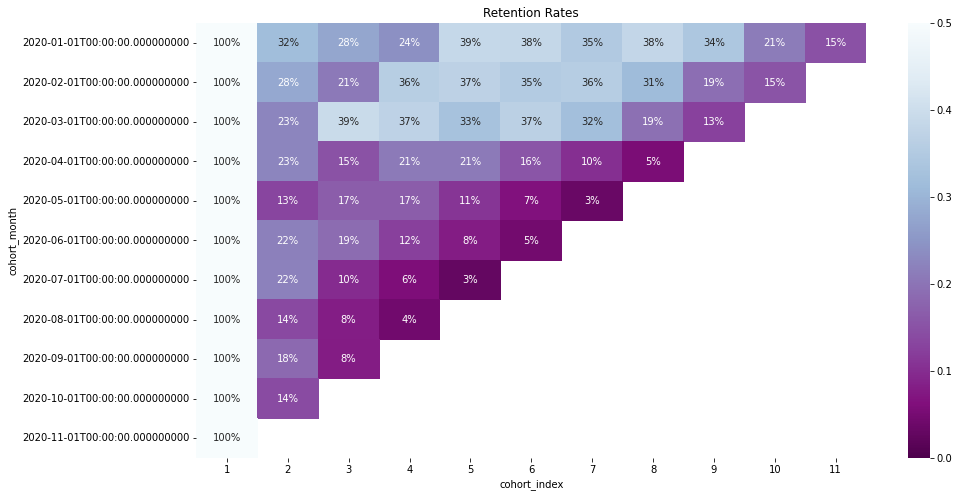

In [ ]:
# Membuat visualisasi cohort menggunakan heatmap
plt.figure(figsize=(15, 8))
plt.title('Retention Rates')
sns.heatmap(data=retention, annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="BuPu_r")
plt.show()

### Kesimpulan

Dari hasil perhitungan dan visualisasi sebelumnya, dapat diketahui:

1. Meninjau hasil perhitungan cohort_counts, diketahui jumlah user day 1 setiap bulan memiliki perubahan yang fluktuatif, dimana:
  - Jumlah user day 1 memiliki peak pada bulan Agustus 2020 sebanyak 22490,0 users dan memiliki titik terendah pada bulan Februari 2020 sebanyak 1376,0 users
  - Penurunan pada awalnya Jan 2022 - Feb 2022, kenaikan pada Feb 2022 - Mei 2022, penurunan pada Mei 2022 - Jun 2022, kenaikan pada Jun 2022 - Agu 2022, penurunan pada Agu 2022 - Nov 2022
2. Meninjau hasil visualisasi retention, diketahui %perubahan jumlah user mengalami penurunan yang signifikan dari day 1 ke day 2 sebesar 68% - 87%
3. Meninjau hasil visualisasi retention, berdasarkan baris bulan Januari 2020, diketahui %perubahan jumlah user mengalami perubahan yang fluktuatif, dimana:
  - Terjadi penurunan pada awalnya day 1 - day 4, kenaikan pada day 4 - day 5, penurunan lagi pada day 5 - day 7, kenaikan lagi pada day 7 - day 8, dan penurunan lagi pada day 8 - day 11
4. Meninjau hasil visualisasi retention, %penurunan jumlah user semakin besar seiring berganti bulan
5. Meninjau hasil visualisasi retention, peristiwa kenaikan kembali (rebound) menjadi semakin cepat terjadi, dimana:
  - Rebound pada Jan 2020 terjadi pada day 4
  - Rebound pada Feb 2020 terjadi pada day 3
  - Rebound pada Mar 2020 terjadi pada day 2
  - Rebound pada Apr 2020 terjadi pada day 3
  - Rebound pada Mei 2020 terjadi pada day 2
  - Tidak ada rebound pada Jun 2020
  - Tidak ada rebound pada Jul 2020
  - dst.

Kesimpulan yang dapat ditarik dari yang diketahui, antara lain:
1. Sebaiknya dianalisa faktor yang menyebabkan terjadinya peak jumlah user pada sekitar Jul 2020 - Agu 2020 sehingga dapat memperoleh insight yang kemungkinan dapat membantu marketing
2. Jika menggunakna Elbow Analysis, maka titik Elbow atau titik kritisnya terletak pada sekitar day 1 - day 2 sehingga perlu dilakukan upaya untuk mencegah terjadinya penurunan jumlah user yang besar
2. Sebaiknya dianalisa faktor yang menyebabkan peristiwa terjadinya rebound jumlah user yang sempat terjadi pada bulan Jan 2020 - Mei 2020 sehingga dapat memperoleh insight yang kemungkinan dapat membantu marketing
4. Sebaiknya dianalisa faktor yang menyebabkan peristiwa rebound jumlah user yang semakin awal terjadi sehingga dapat memperoleh insight yang kemungkinan dapat membantu marketing